# Outlier 

* Identification of Outlier---Boxplot
* Winsorizing Technique
* Capping and Flooring
* mean,Median,Mode Replacement
* Row Deletion
* Bining data

In [2]:
import os

# initial directory 
os.getcwd() 
os.chdir(r"C:\Users\USER\Desktop\imarticus\Github") 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel (r'myworkbook.xlsx') 

In [4]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


# Univariate Analysis

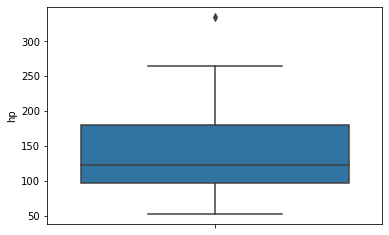

In [6]:
# one numerical variable only
ax = sns.boxplot(y=df["hp"])  # for horizontal use x instead of y 

In [7]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [9]:
df['hp'].describe()

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: hp, dtype: float64

In [10]:
q1 = df['hp'].quantile(0.25)
q3 = df['hp'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

In [11]:
low,high

(-28.75, 305.25)

# Winsorizing Technique 

In [12]:
df['hp']=np.where(df['hp'] > high,high,df['hp']) # upper limit

In [13]:
df['hp']=np.where(df['hp'] < low,low,df['hp'])  # lower limit

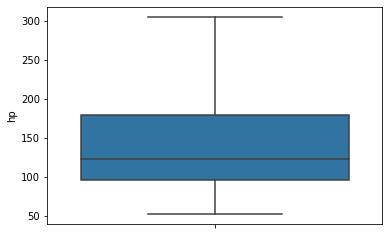

In [14]:
ax = sns.boxplot(y=df["hp"])  # for horizontal use x instead of y 

In [15]:
df['hp'].describe()

count     32.000000
mean     145.757812
std       66.083936
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      305.250000
Name: hp, dtype: float64

# To Replace with mean,Median,Mode

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel (r'myworkbook.xlsx') 

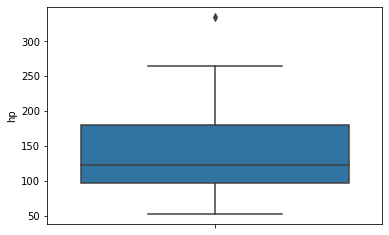

In [17]:
# one numerical variable only
ax = sns.boxplot(y=df["hp"])  # for horizontal use x instead of y 

In [18]:
import numpy as np
from scipy import stats

#mean value
mean= np.mean(df['hp'])

#median value
median = np.median(df['hp'])

#mode value
mode= stats.mode(df['hp'])

In [19]:
mean,median,mode

(146.6875, 123.0, ModeResult(mode=array([110], dtype=int64), count=array([3])))

In [20]:
df['hp']=np.where(df['hp'] > high,np.mean(df['hp']),df['hp']) # mean replacement 

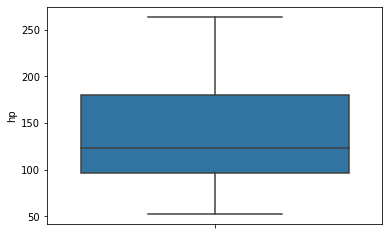

In [21]:
# one numerical variable only
ax = sns.boxplot(y=df["hp"])  # for horizontal use x instead of y 

In [22]:
df['hp']=np.where(df['hp'] > high,np.median(df['hp']),df['hp']) # Median replacement 

# Binning data

In [23]:
bins=[52,95,110,150,250,300] # bins 52-95 and 52 will not been 
#read and last 95 is taken into consideration

In [24]:
group_names=['low','average','good','brillant','awesome']

In [25]:
df['hp_bins']=pd.cut(df['hp'],bins,
                     labels=group_names,include_lowest=True) 
# if include_lowest=True then lowest is included

In [26]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp_bins
0,21.0,6,160.0,110.0000,3.90,2.620,16.46,0,1,4,4,average
1,21.0,6,160.0,110.0000,3.90,2.875,17.02,0,1,4,4,average
2,22.8,4,108.0,93.0000,3.85,2.320,18.61,1,1,4,1,low
3,21.4,6,258.0,110.0000,3.08,3.215,19.44,1,0,3,1,average
4,18.7,8,360.0,175.0000,3.15,3.440,17.02,0,0,3,2,brillant
5,18.1,6,225.0,105.0000,2.76,3.460,20.22,1,0,3,1,average
6,14.3,8,360.0,245.0000,3.21,3.570,15.84,0,0,3,4,brillant
7,24.4,4,146.7,62.0000,3.69,3.190,20.00,1,0,4,2,low
8,22.8,4,140.8,95.0000,3.92,3.150,22.90,1,0,4,2,low
9,19.2,6,167.6,123.0000,3.92,3.440,18.30,1,0,4,4,good


# Row Deletion or Subset

In [27]:
a=df[df.hp <=305] 

In [28]:
a

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,hp_bins
0,21.0,6,160.0,110.0000,3.90,2.620,16.46,0,1,4,4,average
1,21.0,6,160.0,110.0000,3.90,2.875,17.02,0,1,4,4,average
2,22.8,4,108.0,93.0000,3.85,2.320,18.61,1,1,4,1,low
3,21.4,6,258.0,110.0000,3.08,3.215,19.44,1,0,3,1,average
4,18.7,8,360.0,175.0000,3.15,3.440,17.02,0,0,3,2,brillant
5,18.1,6,225.0,105.0000,2.76,3.460,20.22,1,0,3,1,average
6,14.3,8,360.0,245.0000,3.21,3.570,15.84,0,0,3,4,brillant
7,24.4,4,146.7,62.0000,3.69,3.190,20.00,1,0,4,2,low
8,22.8,4,140.8,95.0000,3.92,3.150,22.90,1,0,4,2,low
9,19.2,6,167.6,123.0000,3.92,3.440,18.30,1,0,4,4,good


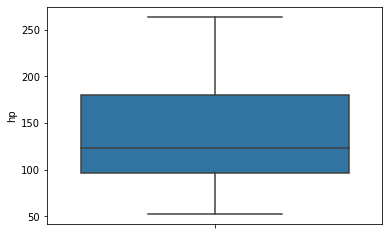

In [29]:
# one numerical variable only
ax = sns.boxplot(y=a["hp"])  # for horizontal use x instead of y 

In [30]:
import seaborn as sns

In [31]:
tips = sns.load_dataset('tips')

In [32]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [33]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


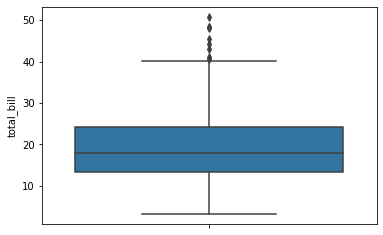

In [35]:
# one numerical variable only
ax = sns.boxplot(y=tips["total_bill"])  # for horizontal use x instead of y 

# Bi-Variate Analysis 

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

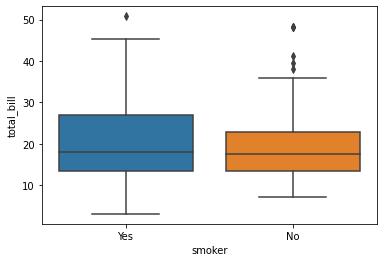

In [36]:
# one numerical variable and several groups
sns.boxplot(x=tips["smoker"], y=tips["total_bill"] )


<AxesSubplot:>

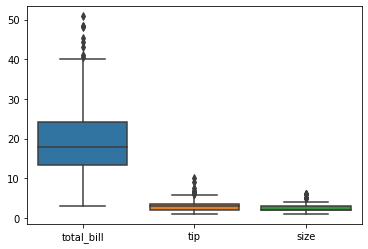

In [37]:
# for all Numerical Variable in a data set  
sns.boxplot(data=tips)

In [38]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Missing Value

In [39]:
import pandas as pd
import numpy as np

In [41]:
import pandas as pd

df1 = pd.read_excel (r'Missing_File.xlsx') 

In [42]:
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,NaN,2.620,16.46,NaN,1.0,4.0,4
1,21.0,6,160.0,110,3.90,2.875,17.02,NaN,1.0,NaN,4
2,22.8,4,108.0,93,NaN,2.320,18.61,1.0,1.0,4.0,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1.0,NaN,3.0,1
4,18.7,8,360.0,175,3.15,NaN,17.02,0.0,0.0,3.0,2
5,18.1,6,225.0,105,2.76,NaN,20.22,1.0,0.0,3.0,1
6,14.3,8,360.0,245,3.21,NaN,15.84,0.0,0.0,3.0,4
7,24.4,4,146.7,62,3.69,NaN,20.00,1.0,0.0,4.0,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1.0,0.0,4.0,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1.0,0.0,4.0,4


In [43]:
print(df1.shape)

(32, 11)


In [44]:
# count the number of NaN values in each column
print(df1.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    2
wt      4
qsec    0
vs      2
am      1
gear    1
carb    0
dtype: int64


In [45]:
df1.count()

mpg     32
cyl     32
disp    32
hp      32
drat    30
wt      28
qsec    32
vs      30
am      31
gear    31
carb    32
dtype: int64

# Remove Rows With Missing Values

In [46]:
df1.dropna(inplace=True) 

In [47]:
print(df1.shape)

(24, 11)


In [48]:
df1.count()

mpg     24
cyl     24
disp    24
hp      24
drat    24
wt      24
qsec    24
vs      24
am      24
gear    24
carb    24
dtype: int64

In [49]:
# count the number of NaN values in each column
print(df1.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


# Impute Missing Values

* Mean
* Median
* Mode

In [50]:
import pandas as pd

df1 = pd.read_excel (r'Missing_File.xlsx') 

In [51]:
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,NaN,2.620,16.46,NaN,1.0,4.0,4
1,21.0,6,160.0,110,3.90,2.875,17.02,NaN,1.0,NaN,4
2,22.8,4,108.0,93,NaN,2.320,18.61,1.0,1.0,4.0,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1.0,NaN,3.0,1
4,18.7,8,360.0,175,3.15,NaN,17.02,0.0,0.0,3.0,2
5,18.1,6,225.0,105,2.76,NaN,20.22,1.0,0.0,3.0,1
6,14.3,8,360.0,245,3.21,NaN,15.84,0.0,0.0,3.0,4
7,24.4,4,146.7,62,3.69,NaN,20.00,1.0,0.0,4.0,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1.0,0.0,4.0,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1.0,0.0,4.0,4


In [52]:
df1["drat"].fillna(df1["drat"].mean(),inplace=True) # one column at a time 

In [53]:
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.578,2.620,16.46,NaN,1.0,4.0,4
1,21.0,6,160.0,110,3.900,2.875,17.02,NaN,1.0,NaN,4
2,22.8,4,108.0,93,3.578,2.320,18.61,1.0,1.0,4.0,1
3,21.4,6,258.0,110,3.080,3.215,19.44,1.0,NaN,3.0,1
4,18.7,8,360.0,175,3.150,NaN,17.02,0.0,0.0,3.0,2
5,18.1,6,225.0,105,2.760,NaN,20.22,1.0,0.0,3.0,1
6,14.3,8,360.0,245,3.210,NaN,15.84,0.0,0.0,3.0,4
7,24.4,4,146.7,62,3.690,NaN,20.00,1.0,0.0,4.0,2
8,22.8,4,140.8,95,3.920,3.150,22.90,1.0,0.0,4.0,2
9,19.2,6,167.6,123,3.920,3.440,18.30,1.0,0.0,4.0,4


In [54]:
df1.fillna(df1.mean(), inplace=True) 
# by default it will do all column replacment 
#with mean of that column only

In [55]:
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.578,2.620,16.46,0.466667,1.000000,4.000000,4
1,21.0,6,160.0,110,3.900,2.875,17.02,0.466667,1.000000,3.677419,4
2,22.8,4,108.0,93,3.578,2.320,18.61,1.000000,1.000000,4.000000,1
3,21.4,6,258.0,110,3.080,3.215,19.44,1.000000,0.419355,3.000000,1
4,18.7,8,360.0,175,3.150,3.189,17.02,0.000000,0.000000,3.000000,2
5,18.1,6,225.0,105,2.760,3.189,20.22,1.000000,0.000000,3.000000,1
6,14.3,8,360.0,245,3.210,3.189,15.84,0.000000,0.000000,3.000000,4
7,24.4,4,146.7,62,3.690,3.189,20.00,1.000000,0.000000,4.000000,2
8,22.8,4,140.8,95,3.920,3.150,22.90,1.000000,0.000000,4.000000,2
9,19.2,6,167.6,123,3.920,3.440,18.30,1.000000,0.000000,4.000000,4


In [56]:
# count the number of NaN values in each column
print(df1.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


In [57]:
df1.fillna(df1.median(), inplace=True)

In [58]:
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.578,2.620,16.46,0.466667,1.000000,4.000000,4
1,21.0,6,160.0,110,3.900,2.875,17.02,0.466667,1.000000,3.677419,4
2,22.8,4,108.0,93,3.578,2.320,18.61,1.000000,1.000000,4.000000,1
3,21.4,6,258.0,110,3.080,3.215,19.44,1.000000,0.419355,3.000000,1
4,18.7,8,360.0,175,3.150,3.189,17.02,0.000000,0.000000,3.000000,2
5,18.1,6,225.0,105,2.760,3.189,20.22,1.000000,0.000000,3.000000,1
6,14.3,8,360.0,245,3.210,3.189,15.84,0.000000,0.000000,3.000000,4
7,24.4,4,146.7,62,3.690,3.189,20.00,1.000000,0.000000,4.000000,2
8,22.8,4,140.8,95,3.920,3.150,22.90,1.000000,0.000000,4.000000,2
9,19.2,6,167.6,123,3.920,3.440,18.30,1.000000,0.000000,4.000000,4


# Finish 